('reg.coef_ = ', array([ 5.44814029]))
('reg.intercept_ = ', -102360.54329387983)
('score_training_data = ', 0.045509192699524359)
('score_testing_data = ', -1.4849924173685101)
('test data reg.coef_ = ', array([ 2.27410114]))
('test data reg.intercept_ = ', 124444.38886605436)


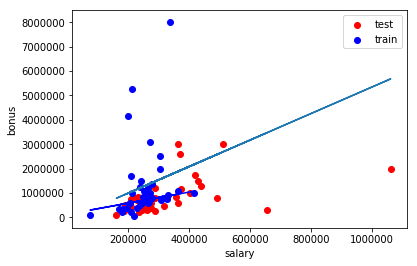

In [9]:
#!/usr/bin/python

"""
    Starter code for the regression mini-project.

    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the
### list will be the "target" feature
features_list = ["bonus", "salary"] #long_term_incentive
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.


from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)

print('reg.coef_ = ', reg.coef_)
print('reg.intercept_ = ', reg.intercept_)

score_training_data = reg.score(feature_train, target_train)
print('score_training_data = ', score_training_data)

score_testing_data = reg.score(feature_test, target_test)
print('score_testing_data = ', score_testing_data)

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color )
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")
 

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)

print('test data reg.coef_ = ', reg.coef_)
print('test data reg.intercept_ = ', reg.intercept_)

plt.plot(feature_train, reg.predict(feature_train), color="b")

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()
